**CapStone project week 2:  Code for  collision data analysis and insights**

Data source is provided by  coursera learning team, down laoded on my system

In [1]:
!pip install -U pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26819 sha256=4ccf2f29b1671cf059c063feb1103a9020043d390f34ab5c4d51d2d571ba0635
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


***Import Python, sklearn and plotting libraries***

In [2]:
#import all required libries ( for both SVM and  Decision tree Classification methods)
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
#import pydotplus
import matplotlib.image as mpimage
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, f1_score,jaccard_similarity_score
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***Load the data file***

In [3]:

df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
df_main = df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
df_main.head(5)



,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


***Identify the Missing data , Null or NaN Field***
Notice that for the total size of data ( Number  of Rows), NaN entries are not siginificant. Hence ***we will remove these rows***

In [6]:
print('NaN in Weather data:', df_main['WEATHER'].isnull().sum())
print('NaN in Road condition data:', df_main['ROADCOND'].isnull().sum())
print('NaN in Light condition data:', df_main['LIGHTCOND'].isnull().sum())

NaN in Weather data: 5081
NaN in Road condition data: 5012
NaN in Light condition data: 5170


In [8]:
df_main = df_main.dropna()

In [9]:
df_main.shape

(189337, 4)

***plot collisions vs road condition data to get insight, and influence of road on collision incidents***



In [13]:
from pandasql import sqldf
dfroadcon= df_main[['ROADCOND','SEVERITYCODE']]
output_roadcon1= sqldf("select ROADCOND , count(SEVERITYCODE) from dfroadcon where SEVERITYCODE = 2  group by ROADCOND ")
output_roadcon2= sqldf("select ROADCOND , count(SEVERITYCODE) from dfroadcon  group by ROADCOND ")
output_roadcon1

,ROADCOND,count(SEVERITYCODE)
0,Dry,40004
1,Ice,273
2,Oil,24
3,Other,43
4,Sand/Mud/Dirt,23
5,Snow/Slush,166
6,Standing Water,30
7,Unknown,747
8,Wet,15742


***Drop  Less significant, unkown and other catagorical conditions***

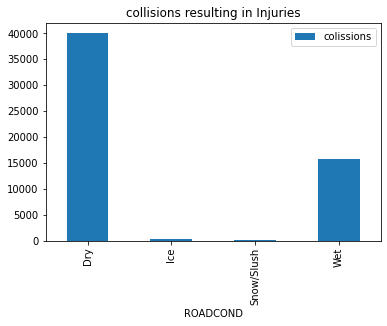

In [14]:
output_roadcon1.set_index(output_roadcon1['ROADCOND'],inplace=True)
output_roadcon1 = output_roadcon1[pd.notnull(output_roadcon1["ROADCOND"])]
output_roadcon1.drop(columns={'ROADCOND'}, inplace=True)
output_roadcon1.drop(['Oil', 'Other','Unknown','Standing Water','Sand/Mud/Dirt'],inplace=True)
output_roadcon1.rename(columns={'count(SEVERITYCODE)':'colissions'},inplace=True)
ax = output_roadcon1.plot.bar(y='colissions', title='collisions resulting in Injuries',rot=90)

In [15]:
output_roadcon2.set_index(output_roadcon2['ROADCOND'],inplace=True)
output_roadcon2 = output_roadcon2[pd.notnull(output_roadcon2["ROADCOND"])]
output_roadcon2.drop(columns={'ROADCOND'}, inplace=True)
output_roadcon2.drop(['Oil', 'Other','Unknown','Standing Water','Sand/Mud/Dirt'],inplace=True)
output_roadcon2.rename(columns={'count(SEVERITYCODE)':'colissions'},inplace=True)

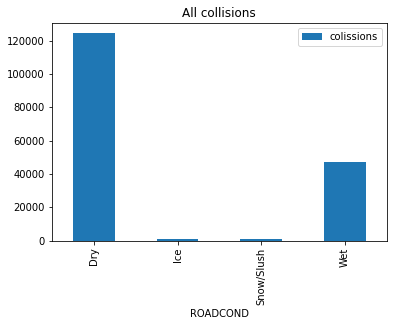

In [16]:
ax = output_roadcon2.plot.bar(y='colissions', title='All collisions',rot=90)

***plot collisions vs Weather condition data to get insight, and influence of Weather  CONDITION on collision incidents***

In [17]:
dfwether= df_main[['WEATHER','SEVERITYCODE']]
output_weather1= sqldf("select WEATHER , count(SEVERITYCODE) from dfwether where SEVERITYCODE = 2  group by WEATHER ")
output_weather2= sqldf("select WEATHER , count(SEVERITYCODE) from dfwether  group by WEATHER ")
output_weather1.set_index(output_weather1['WEATHER'],inplace=True)
output_weather1 = output_weather1[pd.notnull(output_weather1["WEATHER"])]
output_weather1.drop(columns={'WEATHER'}, inplace=True)
output_weather1

,count(SEVERITYCODE)
WEATHER,
Blowing Sand/Dirt,15
Clear,35808
Fog/Smog/Smoke,187
Other,116
Overcast,8739
Partly Cloudy,3
Raining,11168
Severe Crosswind,7
Sleet/Hail/Freezing Rain,28


***Drop  Less significant, unkown and other catagorical conditions***

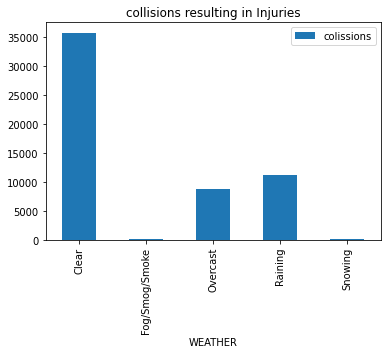

In [18]:
output_weather1.drop(['Blowing Sand/Dirt','Partly Cloudy', 'Other','Unknown','Sleet/Hail/Freezing Rain','Severe Crosswind'],inplace=True)
output_weather1.rename(columns={'count(SEVERITYCODE)':'colissions'},inplace=True)
ax = output_weather1.plot.bar(y='colissions', title='collisions resulting in Injuries',rot=90)

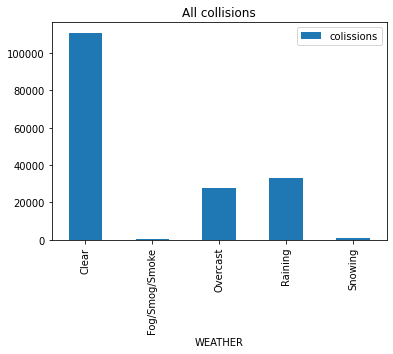

In [19]:
output_weather2.set_index(output_weather2['WEATHER'],inplace=True)
output_weather2 = output_weather2[pd.notnull(output_weather2["WEATHER"])]
output_weather2.drop(columns={'WEATHER'}, inplace=True)
output_weather2.drop(['Blowing Sand/Dirt','Partly Cloudy', 'Other','Unknown','Sleet/Hail/Freezing Rain','Severe Crosswind'],inplace=True)
output_weather2.rename(columns={'count(SEVERITYCODE)':'colissions'},inplace=True)
ax = output_weather2.plot.bar(y='colissions', title='All collisions',rot=90)

***plot collisions vsLighting condition data to get insight, and influence of LIGHT  CONDITION on collision incidents***

In [20]:
dflighting= df_main[['LIGHTCOND','SEVERITYCODE']]
output_lighting1= sqldf("select LIGHTCOND , count(SEVERITYCODE) from dflighting where SEVERITYCODE = 2  group by LIGHTCOND ")
output_lighting2= sqldf("select LIGHTCOND , count(SEVERITYCODE) from dflighting  group by LIGHTCOND ")
output_lighting1.set_index(output_lighting1['LIGHTCOND'],inplace=True)
output_lighting1 = output_lighting1[pd.notnull(output_lighting1["LIGHTCOND"])]
output_lighting1.drop(columns={'LIGHTCOND'}, inplace=True)
output_lighting1

,count(SEVERITYCODE)
LIGHTCOND,
Dark - No Street Lights,334
Dark - Street Lights Off,316
Dark - Street Lights On,14451
Dark - Unknown Lighting,4
Dawn,824
Daylight,38528
Dusk,1938
Other,52
Unknown,605


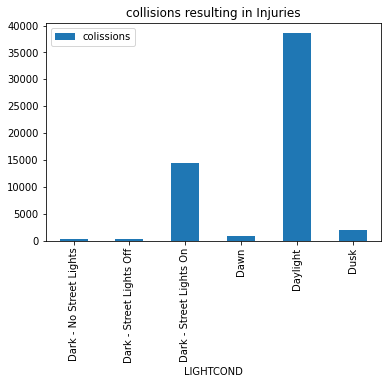

In [21]:
output_lighting1.drop(['Dark - Unknown Lighting','Other','Unknown'],inplace=True)
output_lighting1.rename(columns={'count(SEVERITYCODE)':'colissions'},inplace=True)
ax = output_lighting1.plot.bar(y='colissions', title='collisions resulting in Injuries',rot=90)

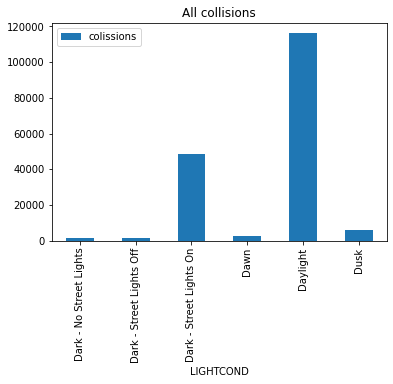

In [22]:
output_lighting2.set_index(output_lighting2['LIGHTCOND'],inplace=True)
output_lighting2 = output_lighting2[pd.notnull(output_lighting2["LIGHTCOND"])]
output_lighting2.drop(columns={'LIGHTCOND'}, inplace=True)
output_lighting2.drop(['Dark - Unknown Lighting','Other','Unknown'],inplace=True)
output_lighting2.rename(columns={'count(SEVERITYCODE)':'colissions'},inplace=True)
ax = output_lighting2.plot.bar(y='colissions', title='All collisions',rot=90)

Below is the  insight of collision description:  Note 45% of all collisions are with Parked vehicle

In [23]:
df['ST_COLDESC'].value_counts()


One parked--one moving                                                 44421
Entering at angle                                                      34674
From same direction - both going straight - one stopped - rear-end     25771
Fixed object                                                           13554
From same direction - both going straight - both moving - sideswipe    12777
                                                                       ...  
Railway Vehicle Strikes Pedalcyclist                                       2
Vehicle Strikes All Other Non-Domestic Animal                              2
Vehicle Hits State Road or Construction Machinery                          1
Vehicle Strikes Deer                                                       1
Non-domestic animal (deer, bear, elk, etc)                                 1
Name: ST_COLDESC, Length: 62, dtype: int64

**For the purpose of predection,  Lets consider Severity as "Injury ro people" as target variable, predict how the above catagorical values impact the  result. Meaning The probablility of Injury occuring
we shall conver the  Value filed to 1 (if collision result in Injury) and 0 (Is collision result in Property Loss)**

In [20]:
count = df_main.shape[0]
i=0;
for i in range(count):
    if df_main.at[i ,'SEVERITYCODE'] ==2:
        df_main.at[i,'SEVERITYCODE'] = 1
    elif df_main.at[i ,'SEVERITYCODE'] ==1:
        df_main.at[i,'SEVERITYCODE'] = 0
    else:
        print ('error')

***We will use SVM for Prediction  and then easure the accuray.  First create the Train/Test data set***

***List all catagorical value types of  WEATHER column. we will do this for other columns  LIGHTCOND and ROADCOND as well***
***Note : we will remove values which are negligible in count , and/or unbele to use  ex: Unknown /Others***

In [23]:
df_main = pd.get_dummies(df_main, columns=["WEATHER"])
df_main.drop(["WEATHER_Other","WEATHER_Blowing Sand/Dirt","WEATHER_Partly Cloudy","WEATHER_Severe Crosswind","WEATHER_Unknown","WEATHER_Sleet/Hail/Freezing Rain"],axis=1, inplace = True)
df_main.rename(columns={'WEATHER_Clear': 'Clearsky', 'WEATHER_Overcast': 'Overcast','WEATHER_Raining':'Raining','WEATHER_Snowing':'Snowing','WEATHER_Fog/Smog/Smoke':'Foggy'}, inplace = True)
df_main.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,Clearsky,Foggy,Overcast,Raining,Snowing
0,1,Wet,Daylight,0,0,1,0,0
1,0,Wet,Dark - Street Lights On,0,0,0,1,0
2,0,Dry,Daylight,0,0,1,0,0
3,0,Dry,Daylight,1,0,0,0,0
4,1,Wet,Daylight,0,0,0,1,0


***Note: Data has 38 variables, however we will consider the critical variables that impact the target and the problem***
Also observe that  all these variables are ***Catagorical*** in values.  We will apply ***One Hot Encoding*** while cleaning and preparing data for data model

In [176]:
print('Lighting conditions:', df_main['LIGHTCOND'].value_counts())
df_main = pd.get_dummies(df_main, columns=["LIGHTCOND"])
df_main.drop(["LIGHTCOND_Other","LIGHTCOND_Unknown","LIGHTCOND_Dark - Unknown Lighting"],axis=1, inplace = True)
df_main.rename(columns={'LIGHTCOND_Daylight': 'Daylight', 'LIGHTCOND_Dusk': 'Dusk','LIGHTCOND_Dark - Street Lights On':'Dark & Street Lighton','LIGHTCOND_Dawn': 'Dawn'}, inplace = True)
df_main['Dark-nolights'] = df_main[ "LIGHTCOND_Dark - Street Lights Off"] + df_main["LIGHTCOND_Dark - No Street Lights"]
df_main.drop(["LIGHTCOND_Dark - Street Lights Off","LIGHTCOND_Dark - No Street Lights"],axis=1, inplace = True)
df_main.head()

Lighting conditions: Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13456
Dusk                          5889
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1192
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


,SEVERITYCODE,WEATHER,ROADCOND,Dark & Street Lighton,Dawn,Daylight,Dusk,Dark-nolights
0,2,Overcast,Wet,0,0,1,0,0
1,1,Raining,Wet,1,0,0,0,0
2,1,Overcast,Dry,0,0,1,0,0
3,1,Clear,Dry,0,0,1,0,0
4,2,Raining,Wet,0,0,1,0,0


In [25]:
df_main['ROADCOND'].value_counts()
df_main = pd.get_dummies(df_main, columns=["ROADCOND"])
df_main.drop(["ROADCOND_Other","ROADCOND_Unknown","ROADCOND_Standing Water","ROADCOND_Oil","ROADCOND_Sand/Mud/Dirt"],axis=1, inplace = True)
df_main.rename(columns={'ROADCOND_Dry': 'Dry Road', 'ROADCOND_Ice': 'Icy Road', 'ROADCOND_Wet': 'Wet Road','ROADCOND_Snow/Slush': 'Slushy Road'}, inplace =True)
df_main.head()

,SEVERITYCODE,Clearsky,Foggy,Overcast,Raining,Snowing,Dark & Street Lighton,Dawn,Daylight,Dusk,Dark-nolights,Dry Road,Icy Road,Slushy Road,Wet Road
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [26]:
df_main.columns

Index(['SEVERITYCODE', 'Clearsky', 'Foggy', 'Overcast', 'Raining', 'Snowing',
       'Dark & Street Lighton', 'Dawn', 'Daylight', 'Dusk', 'Dark-nolights',
       'Dry Road', 'Icy Road', 'Slushy Road', 'Wet Road'],
      dtype='object')

In [27]:
X = np.asarray(df_main[['Clearsky','Foggy','Overcast','Raining','Snowing','Dark & Street Lighton','Dawn','Daylight','Dusk','Dark-nolights','Dry Road','Icy Road','Slushy Road','Wet Road']])
y=np.asarray(df_main[['SEVERITYCODE']])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (136271, 14) (136271, 1)
Test set: (58402, 14) (58402, 1)


In [28]:
# Apply the SVM model
model= svm.SVC(kernel='poly', degree=3)
model.fit(X_train, y_train) 

yhat = model.predict(X_test)
yhat[0:5]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0])

*** Evaluate the Model using  F1_score and Jaccard Similarity***

In [29]:
f1_score(y_test,yhat, average='weighted')

0.5810305023295638

In [30]:
jaccard_similarity_score(y_test,yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7034690592787918

TRY   Decision Tree : Retuns the same values  for accuracy like in SVM

In [ ]:
Dtree =DecisionTreeClassifier(criterion="entropy", max_depth =6)
Dtree.fit(X_train,y_train)
yhattree = Dtree.predict(X_test)


In [ ]:
#jaccard_similarity_score(y_test,yhattree)

In [ ]:
#f1_score(y_test,yhattree, average='weighted')

In [25]:
df['DATE'] = pd.to_datetime(df['INCDATE']).dt.date
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
dfyears= df[['YEAR','SEVERITYCODE']]

Build a view of incidents over the years

In [26]:
output_years= sqldf("select YEAR, count(SEVERITYCODE) from dfyears group by YEAR ")


In [27]:
output_years.set_index(output_years['YEAR'],inplace=True)

In [28]:
output_years.drop(columns={'YEAR'}, inplace=True)
output_years.rename(columns={'count(SEVERITYCODE)':'colissions'},inplace=True)

output_years

,colissions
YEAR,
2004,11865
2005,15115
2006,15188
2007,14456
2008,13660
2009,11734
2010,10808
2011,10919
2012,10907


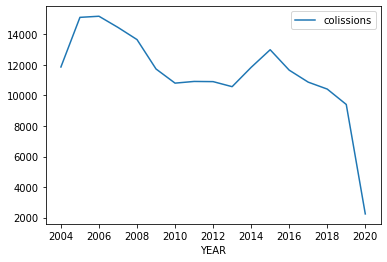

In [29]:
output_years.plot.line()